In [201]:
from glob import glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [202]:
def extractCoord(A):
    x_values = []
    y_values = []
    for i, anomaly in enumerate(A): 
        center = anomaly.center  
        x_values.append(center[0])  
        y_values.append(center[1])  

    center_matrix = np.column_stack((x_values, y_values))
    return center_matrix


def getAngle(A):
    center_matrix = extractCoord(A)
    angle = np.arctan2(center_matrix[:, 1], center_matrix[:, 0])  
    angle_deg = np.degrees(angle)
    angle_deg = np.mod(angle_deg, 360)
    
    return angle_deg

def pca(V,angle):

    pca = PCA(n_components=2)
    V_pca = pca.fit_transform(V)

    plt.figure(figsize=(10,6))
    scatter = plt.scatter(V_pca[:, 0], V_pca[:, 1], c=angle, cmap='viridis')
    plt.colorbar(scatter,label='Winkel (Grad)')
    plt.xlabel('Hauptkomponente 1 (PC1)')
    plt.ylabel('Hauptkomponente 2 (PC2)')
    plt.show()



In [203]:
def loadData():
    file_list = [] 

    data_dirs = glob("data*/")

    for directory in data_dirs:
        file_list = glob(f"{directory}*.npz")  
        file_list = sorted(file_list) 
        V = list()
        A = list()
        
        for file in file_list:
            tmp = np.load(file, allow_pickle=True)
            V.append(tmp["v"])
            A.append(tmp["anomaly"].tolist())

        angle = getAngle(A)
        pca(V,angle)


    #Versuch PCA auf Spannungsdaten anwenden
    #Einfärben der Punkte in der PCA anhand des Winkelsdeg = np.degrees(angle)

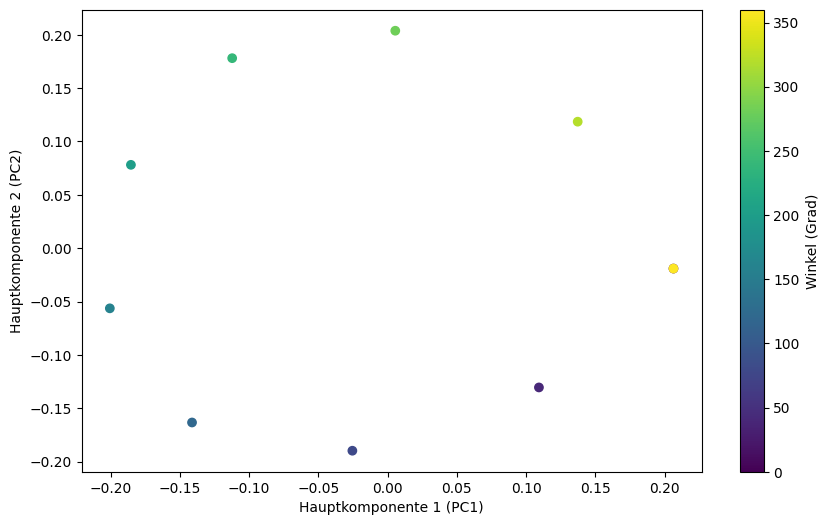

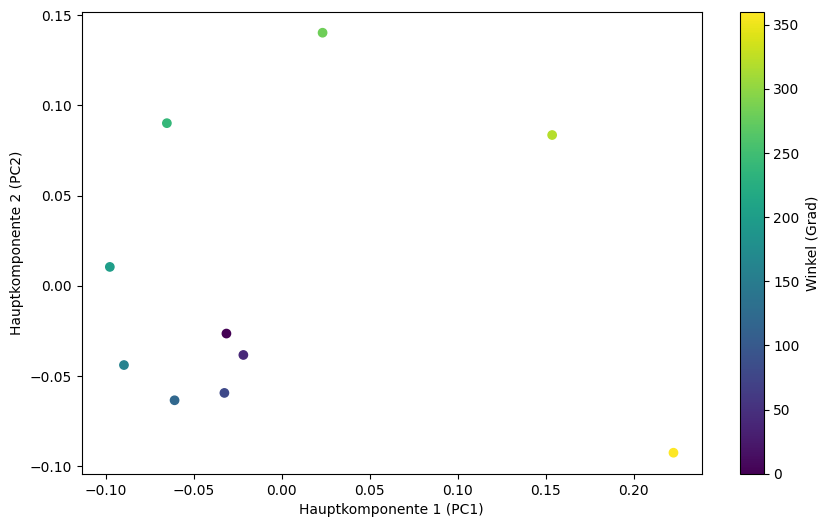

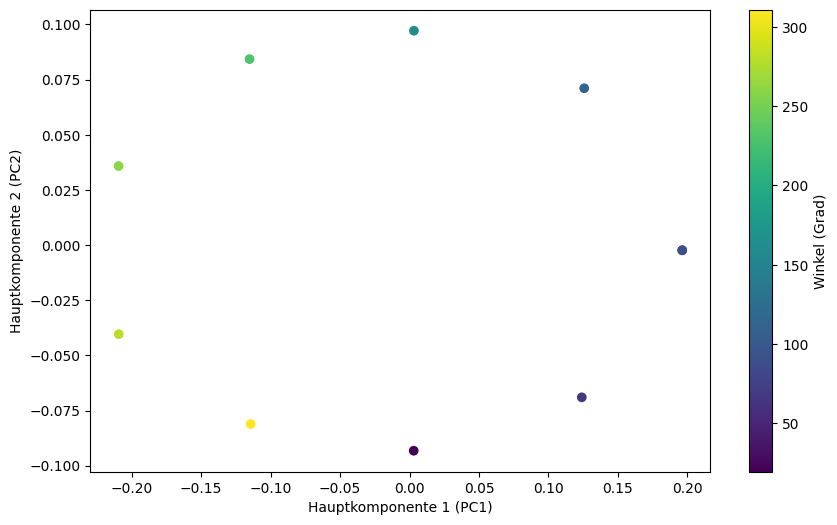

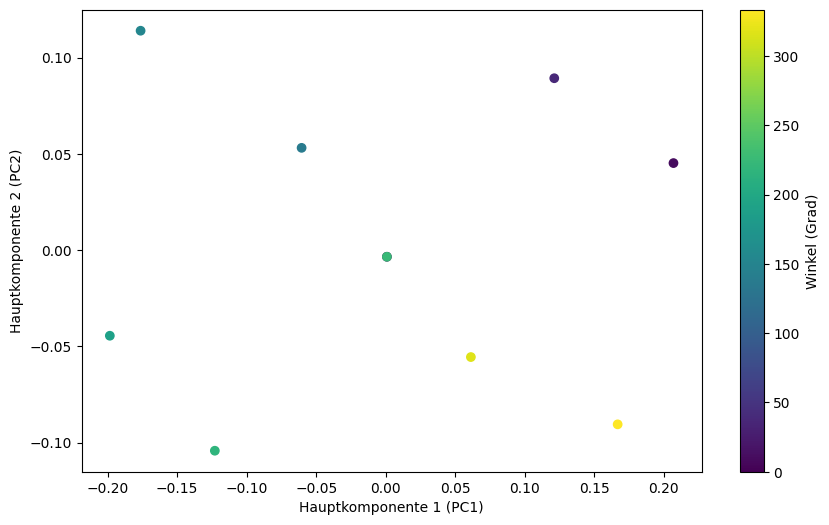

In [204]:
loadData()